# Experiment 4: Qwn-VL Max (China) vs. GPT4 (US) on News Images

In [1]:
# turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imports
import pandas as pd
import numpy as np
import collections
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# load the data
tags_df = pd.read_csv('../data/experiment_4_LLM_image_captioning_news/tags.csv')
tags_df.head(5)

,Model,Image,Chinese,Chinese (trans.),English
0,Qwen-VL,1,"士兵, 战争, 坦克, 破坏, 森林","soldier, war, tank, destruction, forest","tank, destroyed, forest"
1,Qwen-VL,2,"war, destruction, soldiers, rubble, debris, co...","war, destruction, soldiers, rubble, debris, co...","war, soldiers, rubble, destruction"
2,Qwen-VL,3,"坦克,士兵,雪地,战场,军事行动","tanks, soldiers, snow, battlefield, military o...","tank, snow, forest"
3,Qwen-VL,4,"坦克,士兵,射击,火光,战场,草地,天空,云彩,战争,冲突","tank,soldier,shooting,fire,battlefield,grass,s...","tank, fire, explosion, field, sky, clouds, grass"
4,Qwen-VL,5,"坦克, 军事装备, 雪地, 战斗准备, 军事训练, 人员操作, 武装力量","tank,soldier,shooting,fire,battlefield,grass,s...","tank, snow, person"


In [3]:
# for tokenizing
nltk.download('punkt')
nltk.download('stopwords')

# function to process text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marvinlimpijankit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marvinlimpijankit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Collection

In [4]:
# get a list of models ['Qwen-VL', 'GPT4'] 
models = list(tags_df['Model'].unique())

out = []

for model in models:
    
    # slice
    tmp_df = tags_df[(tags_df['Model']==model)]

    # gather English and Chinese captions
    english_captions = [i.replace(",", "") for i in list(tmp_df['English'])]
    chinese_captions = [i.replace(",", "") for i in list(tmp_df['Chinese (trans.)'])]
    
    english_captions = [preprocess_text(i) for i in english_captions]
    chinese_captions = [preprocess_text(i) for i in chinese_captions]
    
    for caption in english_captions:
        out.append([model, 'english', caption])
        
    for caption in chinese_captions:
        out.append([model, 'chinese', caption])

In [5]:
tags_df = pd.DataFrame(out, columns=['Model', 'Language', 'Tags'])

### Caption Length

In [6]:
# caption length column
tags_df['Tag Length'] = tags_df['Tags'].str.len()

In [7]:
tags_length_arr = tags_df.groupby(['Model', 'Language'], as_index=False)['Tag Length'].mean()

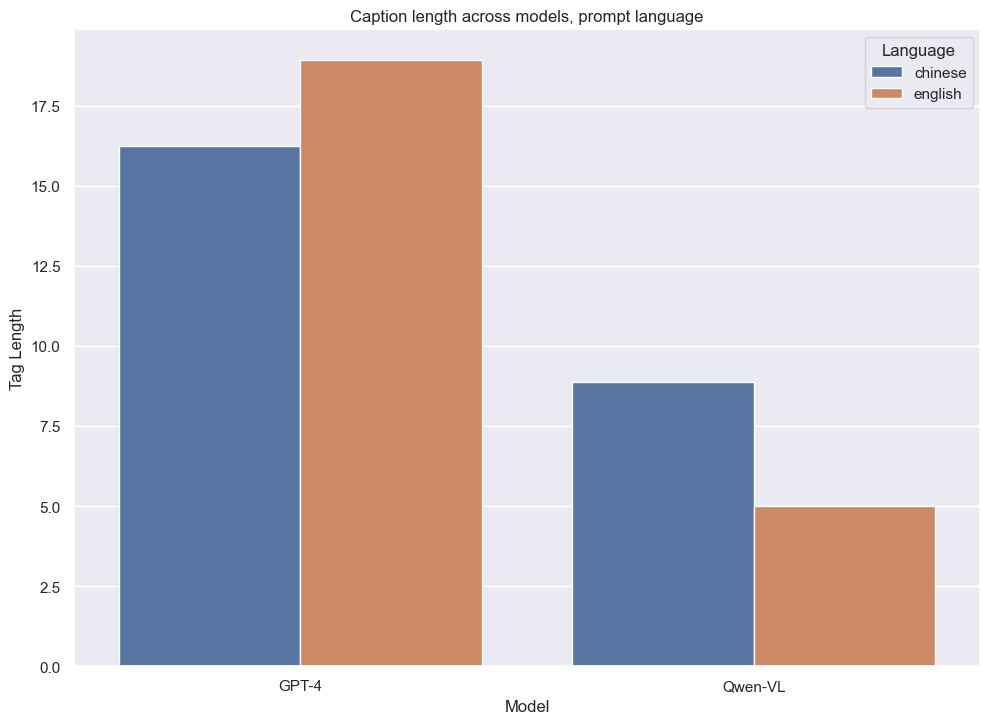

In [8]:
# display the results
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=tags_length_arr, x='Model', y='Tag Length', hue='Language')

plt.title('Caption length across models, prompt language')
plt.show()

In [9]:
length_sig = []

for model_1 in ['Qwen-VL', 'GPT-4']:
    for model_2 in ['Qwen-VL', 'GPT-4']:
        for language_1 in ['english', 'chinese']:
            for language_2 in ['english', 'chinese']:
                
                if model_1 == model_2 and language_1 == language_2:
                    continue
                    
                sample_1 = tags_df[(tags_df['Model']==model_1) & (tags_df['Language']==language_1)]['Tag Length'].values
                sample_2 = tags_df[(tags_df['Model']==model_2) & (tags_df['Language']==language_2)]['Tag Length'].values
                length_sig.append([model_1, language_1, model_2, language_2, '{:.5f}'.format(stats.ttest_ind(sample_1, sample_2).pvalue, 5)])
                
                #print(f'==== {model_1}, {language_1} vs. {model_2}, {language_2}  =====')
                #print(stats.ttest_ind(sample_1, sample_2))
                #print('\n')

In [10]:
length_sig_df = pd.DataFrame(length_sig, columns=['Model 1', 'Language 1', 'Model 2', 'Language 2', 'p value'])

In [11]:
print('Significance test for caption length (equal_var = True)')
length_sig_df

Significance test for caption length (equal_var = True)


,Model 1,Language 1,Model 2,Language 2,p value
0,Qwen-VL,english,Qwen-VL,chinese,0.00031
1,Qwen-VL,chinese,Qwen-VL,english,0.00031
2,Qwen-VL,english,GPT-4,english,0.00000
3,Qwen-VL,english,GPT-4,chinese,0.00000
4,Qwen-VL,chinese,GPT-4,english,0.00000
5,Qwen-VL,chinese,GPT-4,chinese,0.00000
6,GPT-4,english,Qwen-VL,english,0.00000
7,GPT-4,english,Qwen-VL,chinese,0.00000
8,GPT-4,chinese,Qwen-VL,english,0.00000
9,GPT-4,chinese,Qwen-VL,chinese,0.00000


In [80]:
length_sig = []

for model_1 in ['Qwen-VL', 'GPT-4']:
    for model_2 in ['Qwen-VL', 'GPT-4']:
        for language_1 in ['english', 'chinese']:
            for language_2 in ['english', 'chinese']:
                
                if model_1 == model_2 and language_1 == language_2:
                    continue
                    
                sample_1 = tags_df[(tags_df['Model']==model_1) & (tags_df['Language']==language_1)]['Tag Length'].values
                sample_2 = tags_df[(tags_df['Model']==model_2) & (tags_df['Language']==language_2)]['Tag Length'].values
                length_sig.append([model_1, language_1, model_2, language_2, '{:.5f}'.format(stats.ttest_ind(sample_1, sample_2, equal_var=False).pvalue, 5)])
                
                #print(f'==== {model_1}, {language_1} vs. {model_2}, {language_2}  =====')
                #print(stats.ttest_ind(sample_1, sample_2))
                #print('\n')

In [81]:
length_sig_df = pd.DataFrame(length_sig, columns=['Model 1', 'Language 1', 'Model 2', 'Language 2', 'p value'])

In [82]:
print('Significance test for caption length (equal_var = False)')
length_sig_df

Significance test for caption length (equal_var = False)


,Model 1,Language 1,Model 2,Language 2,p value
0,Qwen-VL,english,Qwen-VL,chinese,0.00044
1,Qwen-VL,chinese,Qwen-VL,english,0.00044
2,Qwen-VL,english,GPT-4,english,0.00000
3,Qwen-VL,english,GPT-4,chinese,0.00000
4,Qwen-VL,chinese,GPT-4,english,0.00000
5,Qwen-VL,chinese,GPT-4,chinese,0.00001
6,GPT-4,english,Qwen-VL,english,0.00000
7,GPT-4,english,Qwen-VL,chinese,0.00000
8,GPT-4,chinese,Qwen-VL,english,0.00000
9,GPT-4,chinese,Qwen-VL,chinese,0.00001


In [84]:
model_label = []
tag_lengths = []

for model in ['Qwen-VL', 'GPT-4']:
    for language in ['english', 'chinese']:
        model_label.append((model, language))
        tag_lengths.append(list(tags_df[(tags_df['Model']==model) & (tags_df['Language']==language)]['Tag Length']))
        

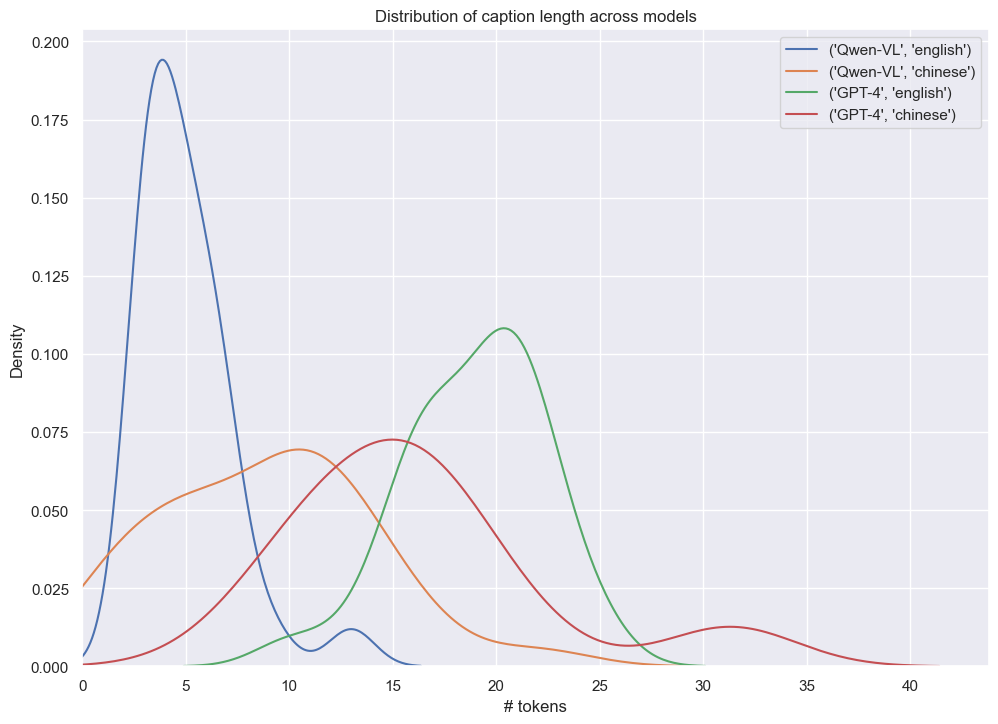

In [89]:
# display the results
for label, data in zip(model_label, tag_lengths): 
    sns.distplot(data, hist=False, rug=False, label=label)
    
plt.title('Distribution of caption length across models')
plt.legend()
plt.xlim(0)
plt.xlabel('# tokens')
plt.show()

### Nouns, Adjectives, Verbs

In [ ]:
# for POS tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

In [104]:
model_label = []
tags = []

for model in ['Qwen-VL', 'GPT-4']:
    for language in ['english', 'chinese']:
        model_label.append((model, language))
        tags.append([i for j in list(tags_df[(tags_df['Model']==model) & (tags_df['Language']==language)]['Tags']) for i in j])
        

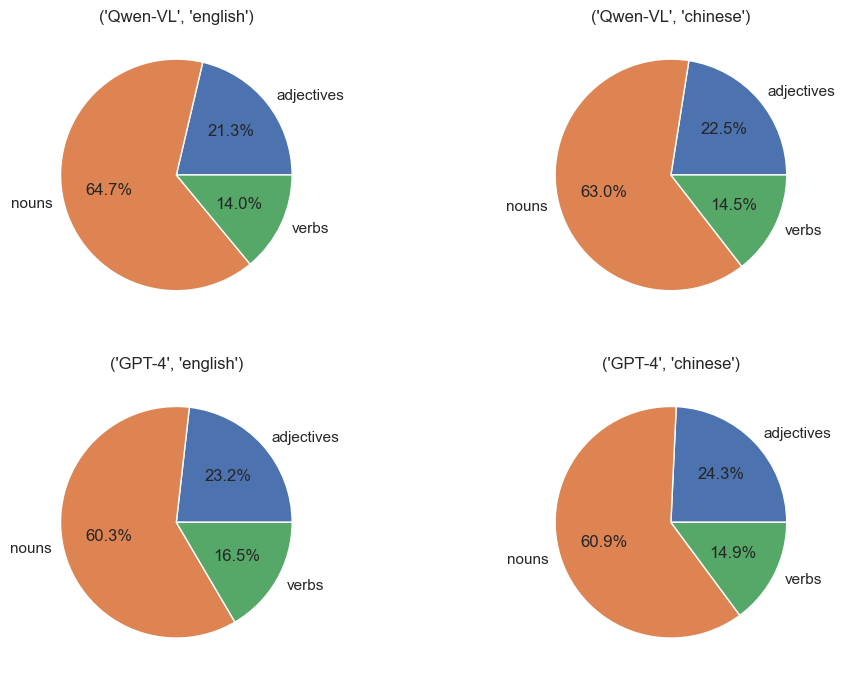

In [107]:
models_arr = []
counts_arr = []

# display the results
fig, axs = plt.subplots(2, 2)

for i, tmp in enumerate(zip(model_label, tags)):
    label = tmp[0]
    data = tmp[1]
    
    tagged = pos_tag(data)
    adjectives = []
    nouns = []
    verbs = []
    
    for word, tag in tagged:
        if tag.startswith('JJ'):
            adjectives.append(word)
        elif tag.startswith('NN'):
            nouns.append(word)
        elif tag.startswith('VB'):
            verbs.append(word)
    
    counts = [len(adjectives), len(nouns), len(verbs)]
    
    models_arr.append(label)
    counts_arr.append(counts)

    axs[i//2, i%2].pie(counts, labels=["adjectives", "nouns", "verbs"], autopct='%1.1f%%')
    axs[i//2, i%2].set_title(label)    

In [117]:
pos_sig = []

for model_1, counts_1 in zip(models_arr, counts_arr):
    for model_2, counts_2 in zip(models_arr, counts_arr):
        if model_1 != model_2:
            total_samples_1 = sum(counts_1)
            total_samples_2 = sum(counts_2)
            counts_2_normalized = [(i/total_samples_2)*total_samples_1 for i in counts_2]
            pos_sig.append([model_1[0], model_1[1], model_2[0], model_2[1], '{:.5f}'.format(stats.chisquare(counts_1, counts_2_normalized).pvalue, 5)])

In [120]:
pos_sig_df = pd.DataFrame(pos_sig, columns=['Model 1', 'Language 1', 'Model 2', 'Language 2', 'p value'])
pos_sig_df

,Model 1,Language 1,Model 2,Language 2,p value
0,Qwen-VL,english,Qwen-VL,chinese,0.91033
1,Qwen-VL,english,GPT-4,english,0.52235
2,Qwen-VL,english,GPT-4,chinese,0.61898
3,Qwen-VL,chinese,Qwen-VL,english,0.84542
4,Qwen-VL,chinese,GPT-4,english,0.59559
5,Qwen-VL,chinese,GPT-4,chinese,0.76291
6,GPT-4,english,Qwen-VL,english,0.07573
7,GPT-4,english,Qwen-VL,chinese,0.30565
8,GPT-4,english,GPT-4,chinese,0.50420
9,GPT-4,chinese,Qwen-VL,english,0.19802


In [121]:
models_arr = []
words_arr = []

for i, tmp in enumerate(zip(model_label, tags)):
    label = tmp[0]
    data = tmp[1]
    
    tagged = pos_tag(data)
    adjectives = []
    nouns = []
    verbs = []
    
    for word, tag in tagged:
        if tag.startswith('JJ'):
            adjectives.append(word)
        elif tag.startswith('NN'):
            nouns.append(word)
        elif tag.startswith('VB'):
            verbs.append(word)
            
    models_arr.append(label)
    words_arr.append([adjectives, nouns, verbs])  

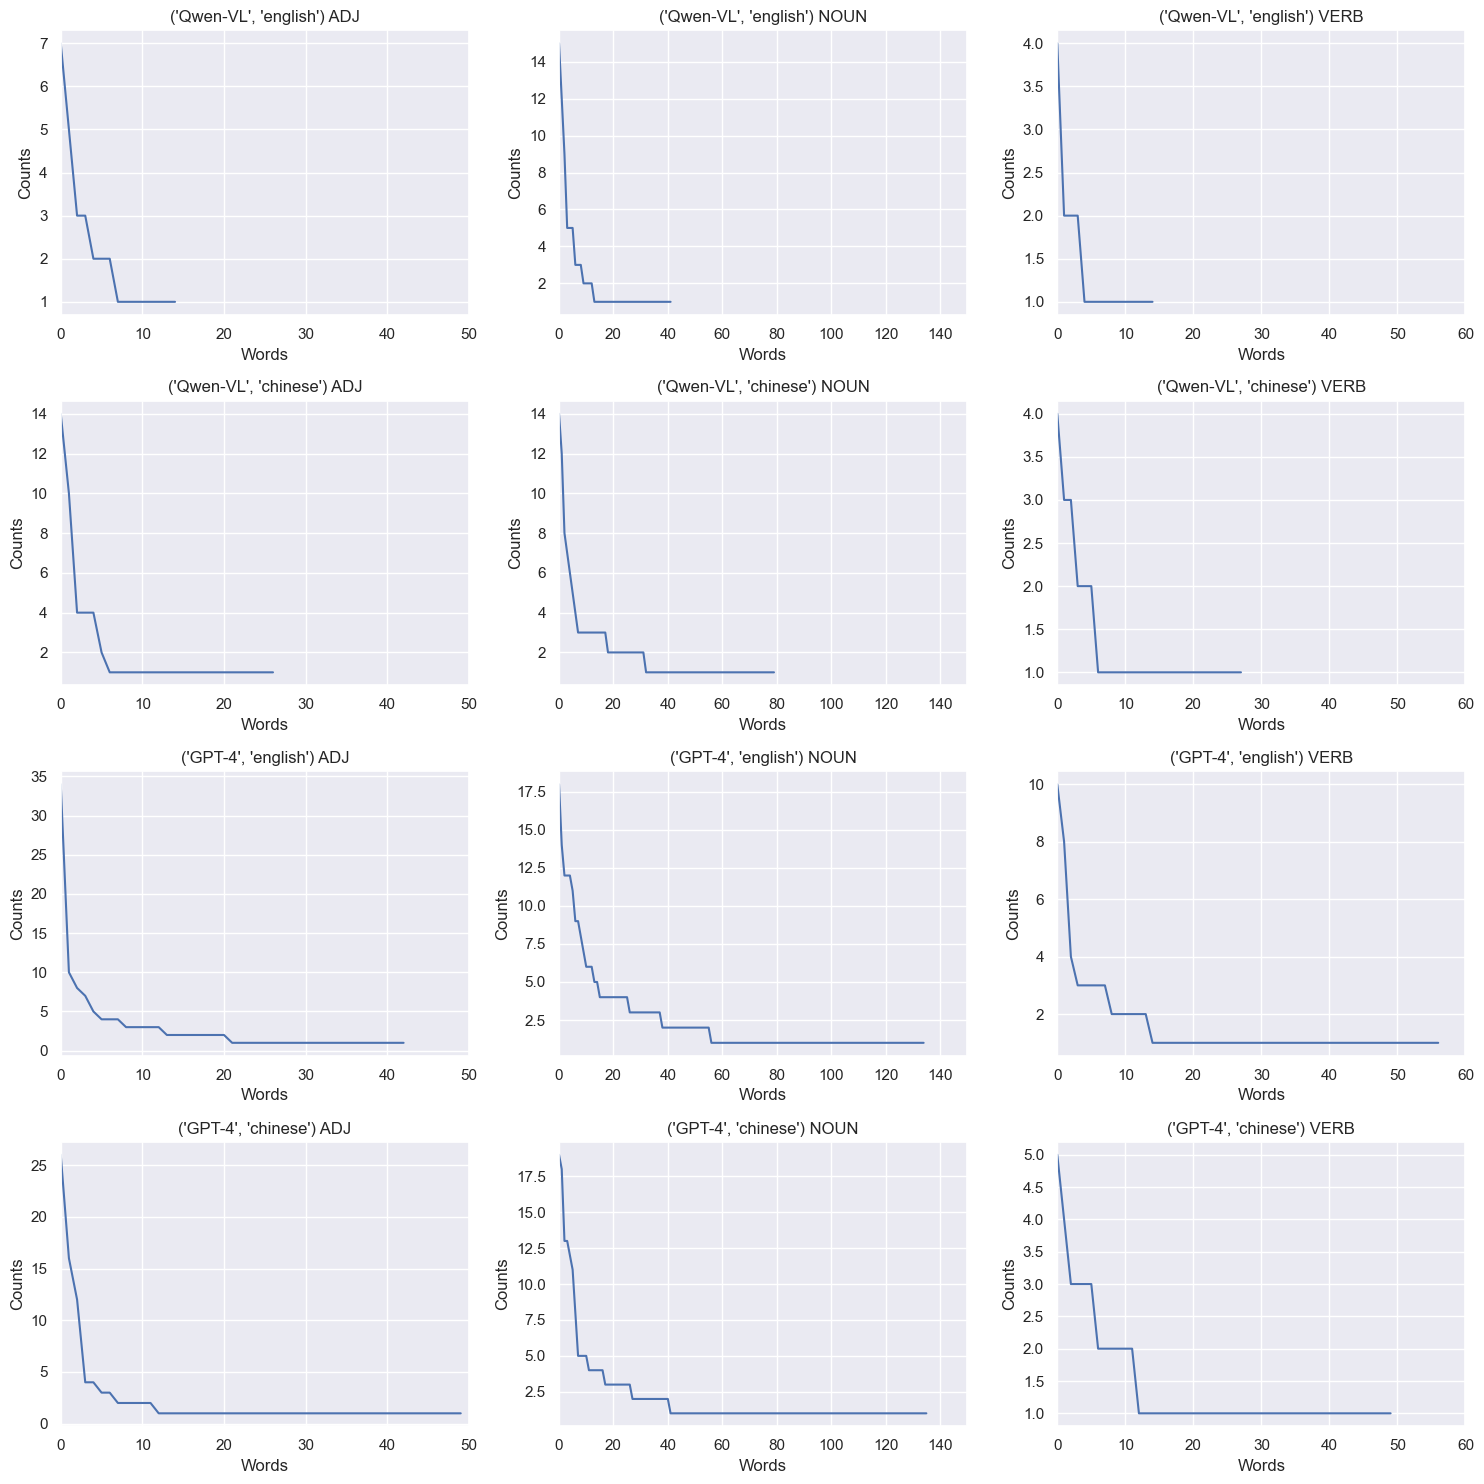

In [166]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for index_1, item in enumerate(zip(models_arr, words_arr)): 
    
    model = item[0]
    words = item[1]
        
    adj_dict = collections.Counter(words[0])
    noun_dict = collections.Counter(words[1])
    verb_dict = collections.Counter(words[2])
    
    pos_mapping = {0: 'ADJ', 1: 'NOUN', 2:'VERB'}
    
    for index_2, pos_dict in enumerate([adj_dict, noun_dict, verb_dict]):
        freq = []
        
        for k,v in pos_dict.items():
            freq.append(v)
            
        freq.sort(reverse=True)
        axs[index_1, index_2].plot(freq)
        
        if index_2 == 0:
            axs[index_1, index_2].set_xlim(0, 50)
        
        elif index_2 == 1:
            axs[index_1, index_2].set_xlim(0, 150)
            
        else: 
            axs[index_1, index_2].set_xlim(0, 60)
            
        axs[index_1, index_2].set_title(f'{model} {pos_mapping[index_2]}')
        axs[index_1, index_2].set_xlabel('Words')
        axs[index_1, index_2].set_ylabel('Counts')
        
plt.tight_layout()

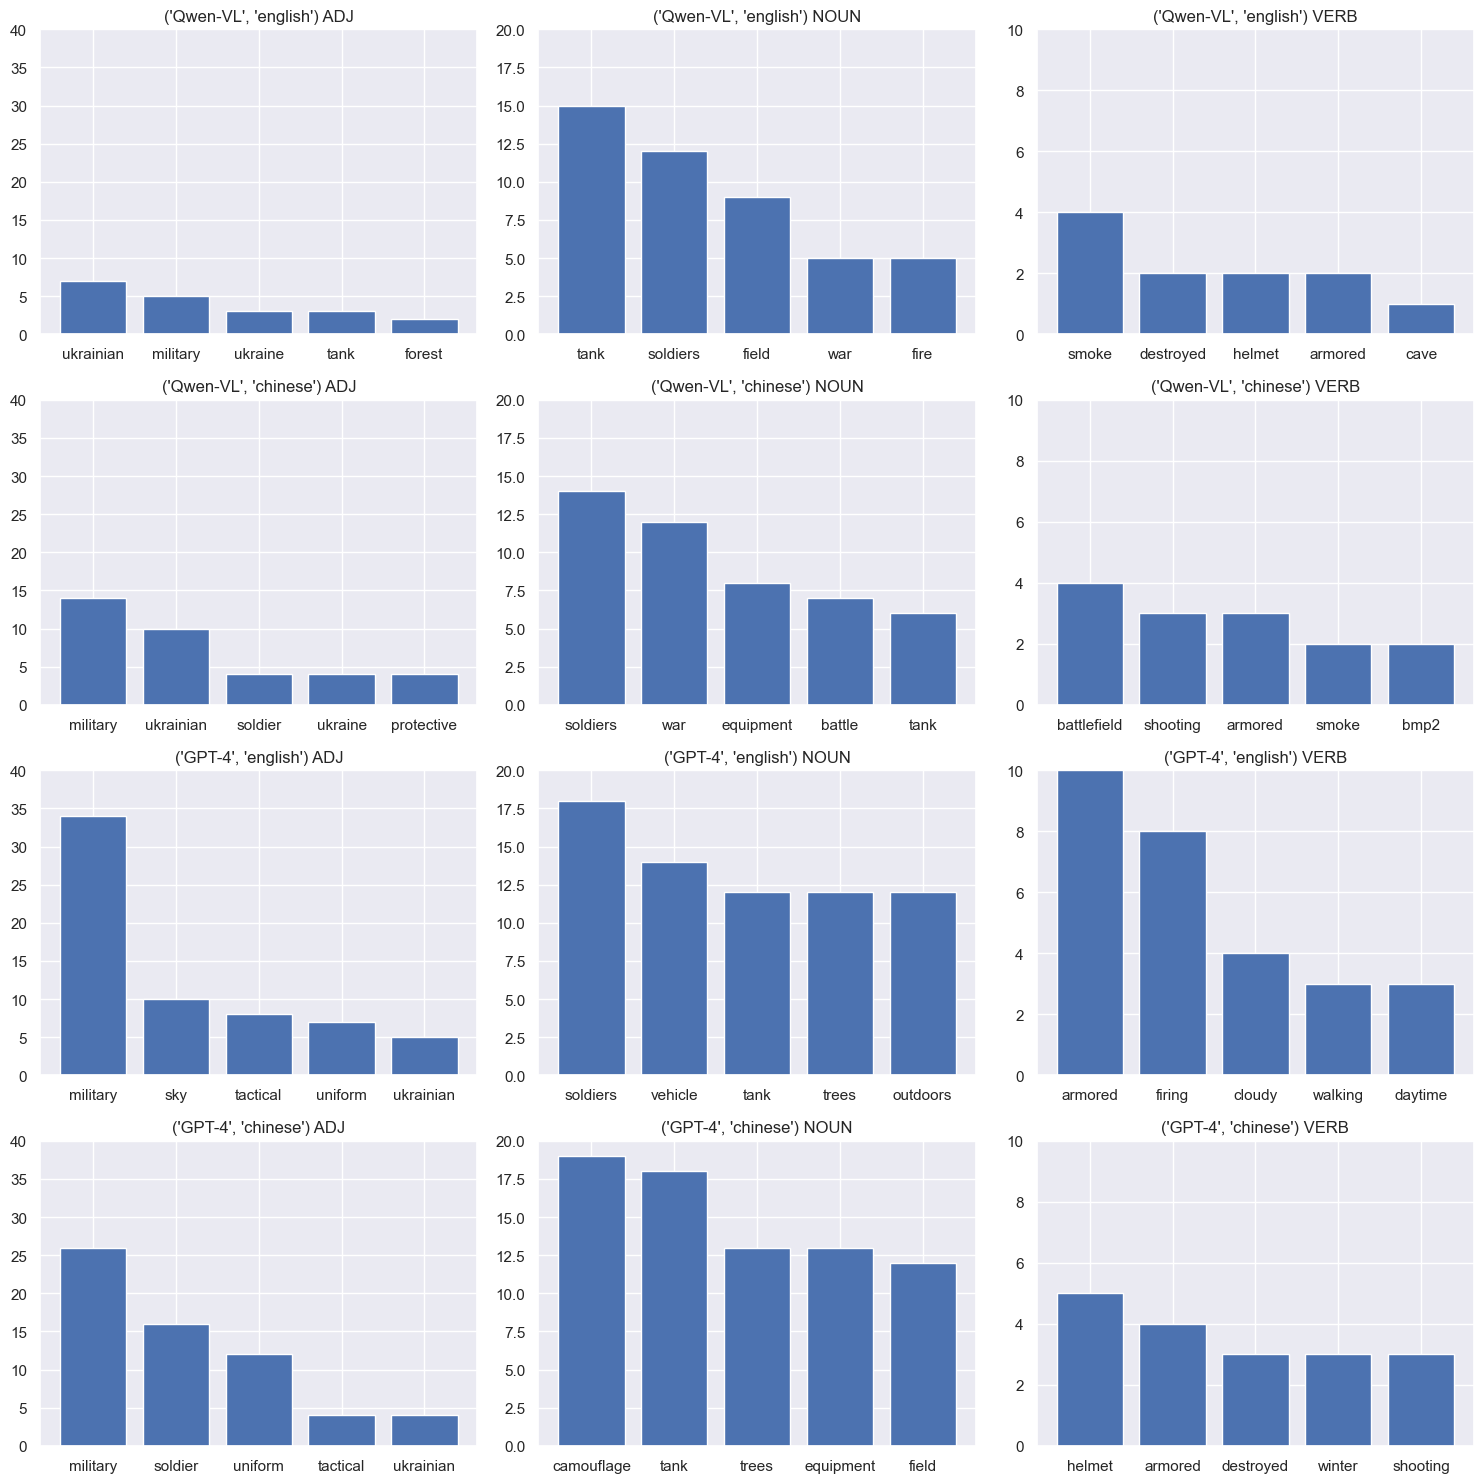

In [183]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

index = 1

for index_1, item in enumerate(zip(models_arr, words_arr)): 
    
    model = item[0]
    words = item[1]
        
    adj_dict = collections.Counter(words[0]).most_common(5)
    noun_dict = collections.Counter(words[1]).most_common(5)
    verb_dict = collections.Counter(words[2]).most_common(5)
    
    pos_mapping = {0: 'ADJ', 1: 'NOUN', 2:'VERB'}
    for index_2, pos_dict in enumerate([adj_dict, noun_dict, verb_dict]):
        value = []
        freq = []
        
        for item in pos_dict:
            value.append(item[0])
            freq.append(item[1])
            
        plt.subplot(4, 3, index)
        plt.bar(value, freq)
        
        if index_2 == 0:
            plt.title('')
            plt.ylim(0, 40)
        
        elif index_2 == 1:
            plt.ylim(0, 20)
            
        else: 
            plt.ylim(0, 10)
        
        plt.title(f'{model} {pos_mapping[index_2]}')
        
        index +=1
        
plt.tight_layout()

### Subjectivity vs. Objectivity

In [ ]:
from nltk.corpus import subjectivity
import nltk.sentiment
from nltk.sentiment import util
nltk.download('subjectivity')

In [191]:
nltk.sentiment.util.demo_sent_subjectivity('test')

Cannot find the sentiment analyzer you want to load.
Training a new one using NaiveBayesClassifier.
Training classifier
Most Informative Features
            contains(--) = True             subj : obj    =     61.0 : 1.0
        contains(film's) = True             subj : obj    =     33.7 : 1.0
       contains(decides) = True              obj : subj   =     28.3 : 1.0
      contains(discover) = True              obj : subj   =     26.3 : 1.0
    contains(girlfriend) = True              obj : subj   =     25.0 : 1.0
          contains(town) = True              obj : subj   =     23.4 : 1.0
  contains(entertaining) = True             subj : obj    =     22.2 : 1.0
     contains(detective) = True              obj : subj   =     21.0 : 1.0
        contains(mother) = True              obj : subj   =     20.1 : 1.0
         contains(finds) = True              obj : subj   =     19.9 : 1.0
Evaluating NaiveBayesClassifier results...
subj


Saving sa_subjectivity.pickle


In [197]:
nltk.sentiment.util.demo_sent_subjectivity('town')

obj
